In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Blurring
# Gaussian noise
# Rotate
# 
# Thresholding
# Nearest Neighborhood

Text(0.5, 1.0, 'Original')

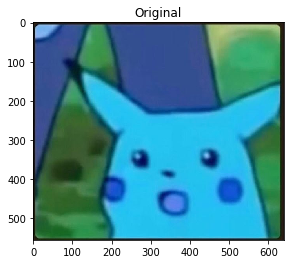

In [16]:
img = cv2.imread('surprised_pikachu.jpg')
plt.imshow(img)
plt.title('Original')

# Blurring


# Additive Gaussian noise


# Salt-and-pepper-noise



# Rotate

# Zoom

# 
# Thresholding
# Nearest Neighborhood

Text(0.5, 1.0, 'Median Blur')

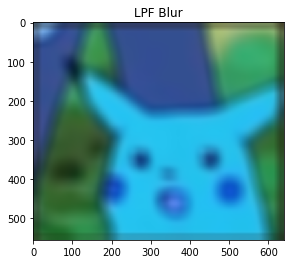

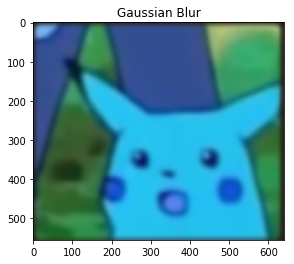

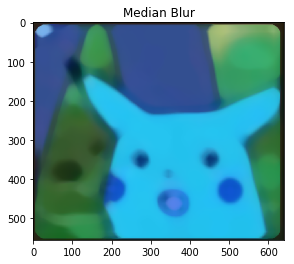

In [5]:
# Blurring (works for both grayscale and color images)

def round_up_to_odd(f):
    f = int(np.ceil(f))
    return f + 1 if f % 2 == 0 else f

# Wrapper
def round_alpha(a):
    return round_up_to_odd(a*49)

def lpf_blur(img,alpha):
    n = round_alpha(alpha)
    # Blur (Averaging)
    blur = cv2.blur(img,(n,n))
    return blur

def gaussian_blur(img, alpha):
    n = round_alpha(alpha)
    # Gaussian Blur (passed through gauss filter)
    gauss_blur = cv2.GaussianBlur(img,(n,n), 0)
    return gauss_blur

def median_blur(img, alpha):
    n = round_alpha(alpha)
    # Median Blur
    median = cv2.medianBlur(img,n)
    return median
    
plt.figure()
plt.imshow(lpf_blur(img,0.7))
plt.title("LPF Blur")
plt.figure()
plt.imshow(gaussian_blur(img,0.7))
plt.title("Gaussian Blur")
plt.figure()
plt.imshow(median_blur(img,0.7))
plt.title("Median Blur")

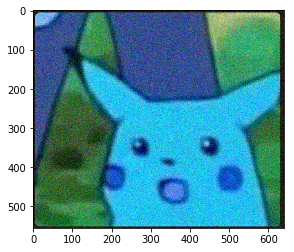

In [6]:
# Additive White Noise (works for both)

def additive_white_noise(img, alpha):
    h, w, c = img.shape

    mu = 0
    sigma = round(alpha*50)
    gauss_noise = np.random.normal(mu, sigma,size=(h,w,c))

    img_copy = img.copy()

    add_img = img_copy + gauss_noise
    neg_mask = add_img < 0
    add_img[neg_mask] = 0

    pos_mask = add_img > 255
    add_img[pos_mask] = 255
    add_img = add_img.astype(int)

    return add_img

plt.imshow(additive_white_noise(img, 0.3))

Text(0.5, 1.0, 'Salt and Pepper')

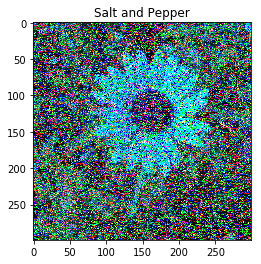

In [169]:
# Salt and Pepper (works for both grayscale and color images)

def salt_and_pepper(img, alpha):
    h, w, c = img.shape

    thresh = round(alpha*0.5*127)

    noise = np.random.randint(255,size=(h,w,c))
    black = noise < thresh
    white = noise > 255 - thresh

    salt_and_pepper = img.copy()
    salt_and_pepper[white] = 255
    salt_and_pepper[black] = 0
    return salt_and_pepper

plt.imshow(salt_and_pepper(img, 0.8))
plt.title('Salt and Pepper')

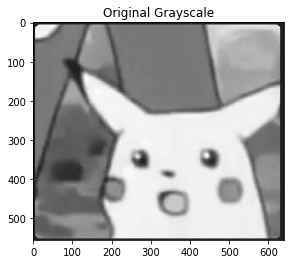

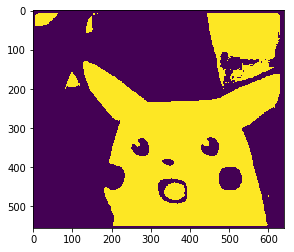

In [8]:
# Thesholding (only intended for grayscale images?)
# alpha value doesn't matter?

def threshold(img,alpha):   
    if img.shape[2] > 1:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img_gray, cmap='gray')
        plt.title("Original Grayscale")
        plt.figure()
    else:
        img_gray = img
    ret, thresh = cv2.threshold(img_gray,127,255, cv2.THRESH_BINARY)
    return thresh

plt.imshow(threshold(img,0.2))

In [62]:
# Zoom 

def zoom(img, alpha):
    h, w, _ = img.shape
    n = 1 + alpha

    zoom = cv2.resize(img, (0,0), fx=n, fy=n, interpolation=cv2.INTER_LINEAR)

    new_tl = np.array([0.5*(n-1)*h, 0.5*(n-1)*w]).astype(int)
    new_br = np.array([0.5*(n+1)*h, 0.5*(n+1)*w]).astype(int)
    
    zoom = zoom[new_tl[0]:new_br[0], new_tl[1]:new_br[1]]
    return zoom

In [68]:
np.random.seed(1234)
np.random.randint(0, 7, 10)

array([3, 6, 5, 4, 4, 0, 1, 1, 1, 2])

[83 96] [638 736]


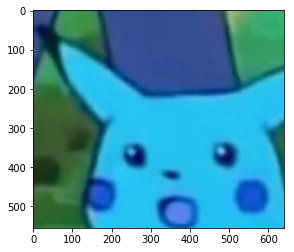

In [61]:
img = cv2.imread('surprised_pikachu.jpg')

alpha  = 0.1


plt.imshow(zoom(img, 0.3))

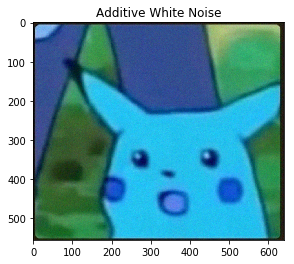

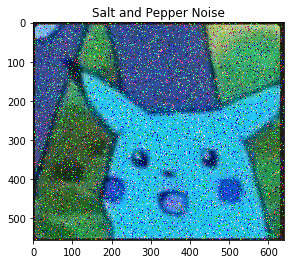

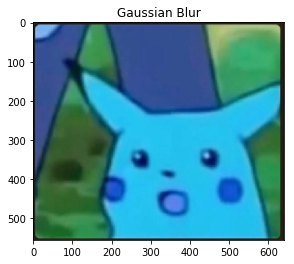

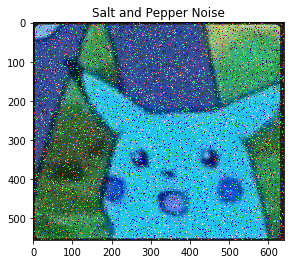

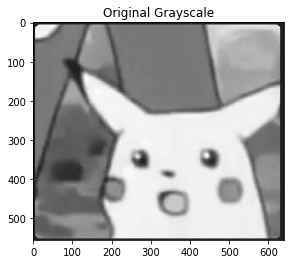

<Figure size 432x288 with 0 Axes>

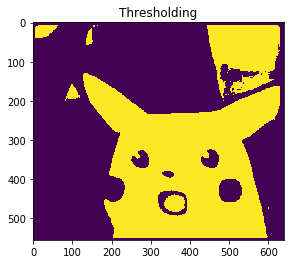

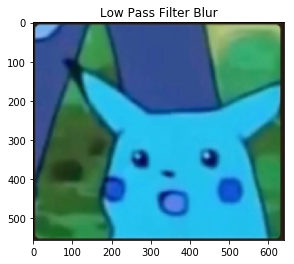

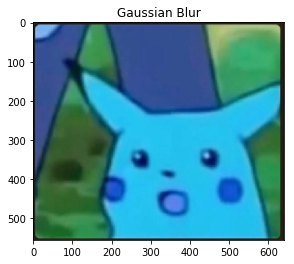

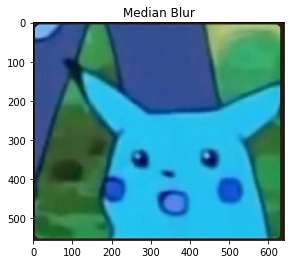

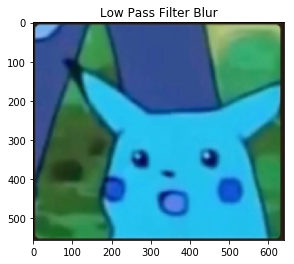

In [74]:
def random_image_transform(img, alpha, show_img_flag=True, set_transform=None):
    
    if set_transform is None:
        n = np.random.randint(0,7)
    else:
        n = set_transform
        
    if n == 0:
        transform = lpf_blur(img, alpha)
        name = "Low Pass Filter Blur"
    elif n == 1:
        transform = gaussian_blur(img,alpha)
        name = "Gaussian Blur"
    elif n == 2:
        transform = median_blur(img, alpha)
        name = "Median Blur"
    elif n == 3:
        transform = additive_white_noise(img, alpha)
        name = "Additive White Noise"
    elif n == 4:
        transform = salt_and_pepper(img, alpha)
        name = "Salt and Pepper Noise"
    elif n == 5:
        transform = threshold(img, alpha)
        name = "Thresholding"
    elif n == 6:
        transform = zoom(img, alpha)
        name = "Zoom"
    
    if show_img_flag:
        plt.figure()
        plt.imshow(transform)
        plt.title(name)

np.random.seed(69420)
for i in range(0,10):
    random_image_transform(img, 0.1)

(299, 299, 3)


True

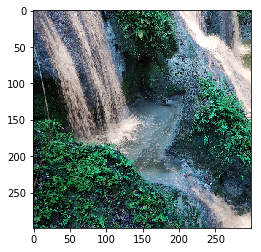

In [125]:
# Preprocess Images

img = cv2.imread('waterfall.jpg')
img = img[500:3523,0:3023]
img = cv2.resize(img,(299,299), interpolation=cv2.INTER_CUBIC)
print(img.shape)
plt.imshow(img)
cv2.imwrite('cropped_waterfall.jpg', img)

(299, 299, 3)


True

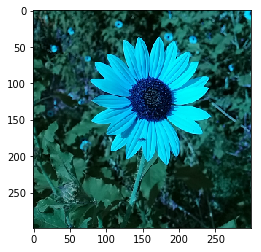

In [170]:
img = cv2.imread('sunflower.jpg')
img = img[500:1580,:]
img = cv2.resize(img,(299,299), interpolation=cv2.INTER_CUBIC)
print(img.shape)
plt.imshow(img)
cv2.imwrite('cropped_sunflower.jpg', img)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from IPython.display import Image, display

# Functions and classes for loading and using the Inception model.
import inception

In [140]:
inception.maybe_download()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [12]:
model = inception.Inception()

Instructions for updating:
Use tf.gfile.GFile.


In [13]:
def classify(image_path):
    # Display the image.
    display(Image(image_path))

    # Use the Inception model to classify the image.
    pred = model.classify(image_path=image_path)

    # Print the scores and names for the top-10 predictions.
    model.print_scores(pred=pred, k=10, only_first_name=True)

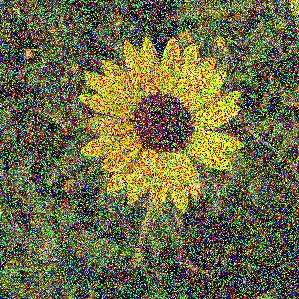

 8.44% : prayer rug
 4.80% : window screen
 3.89% : paper towel
 3.32% : handkerchief
 2.48% : pillow
 2.21% : lampshade
 2.15% : fire screen
 1.84% : vault
 1.78% : doormat
 1.63% : book jacket


In [176]:
#image_path = os.path.join(inception.data_dir, 'cropped_panda.jpg')
# name = image_path
name = 'cropped_sunflower.jpg'
img = cv2.imread(name)
# print(img.shape)
transformed_img = salt_and_pepper(img, 0.0)
name = 'transformed_sunflower.jpg'
cv2.imwrite(name, transformed_img)
classify(image_path=name)

In [175]:
# Use the Inception model to classify the image.
pred = model.classify(image_path=image_path)

# Print the scores and names for the top-10 predictions.
model.p
model.print_scores(pred=pred, k=10, only_first_name=True)

89.11% : giant panda
 0.78% : indri
 0.30% : lesser panda
 0.15% : custard apple
 0.12% : earthstar
 0.09% : sea urchin
 0.05% : forklift
 0.05% : digital watch
 0.05% : gibbon
 0.05% : go-kart


In [ ]:
transformations = ['lpf', 'gaussian', 'median', 'additive', 'salt', 'threshold', 'zoom']

for image_path in images:
    for transform in transformations:
        for alpha in np.linspace(0,1, 101):
            print(alpha)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
